# Módulo 5 Tarefa 1
## Base de nascidos vivos do DataSUS
O DataSUS disponibiliza diversos arquivos de dados com relação a seus segurados, conforme a [lei da transparência de informações públicas](https://www.sisgov.com/transparencia-acesso-informacao/#:~:text=A%20Lei%20da%20Transpar%C3%AAncia%20(LC,em%20um%20site%20na%20internet.).

Essas informações podem ser obtidas pela internet [aqui](http://www2.datasus.gov.br/DATASUS/index.php?area=0901&item=1). Como o processo de obtenção desses arquivos foge um pouco do nosso escopo, deixamos o arquivo ```SINASC_RO_2019.csv``` já como vai ser encontrado no DataSUS. O dicionário de dados está no arquivo ```estrutura_sinasc_para_CD.pdf``` (o nome do arquivo tal qual no portal do DataSUS).

### Nosso objetivo
Queremos deixar uma base organizada para podermos estudar a relação entre partos com risco para o bebê e algumas condições como tempo de parto, consultas de pré-natal etc.

#### Preparação da base
1. Carregue a base 'SINASC_RO_2019.csv'. Conte o número de registros e o número de registros não duplicados da base. Dica: você aprendeu um método que remove duplicados, encadeie este método com um outro método que conta o número de linhas. **Há linhas duplicadas?**  

2. Conte o número de valores *missing* por variável.  

3. Ok, no item anterior você deve ter achado pouco prático ler a informação de tantas variáveis, muitas delas nem devem ser interesantes. Então crie uma seleção dessa base somente com as colunas que interessam. São elas:
```
['LOCNASC', 'IDADEMAE', 'ESTCIVMAE', 'ESCMAE', 'QTDFILVIVO',
    'GESTACAO', 'GRAVIDEZ', 'CONSULTAS', 'APGAR5']
```
Refaça a contagem de valores *missings*.  

4. Apgar é uma *nota* que o pediatra dá ao bebê quando nasce de acordo com algumas características associadas principalmente à respiração. Apgar 1 e Apgar 5 são as notas 1 e 5 minutos do nascimento. Apgar5 será a nossa variável de interesse principal. Então remova todos os registros com Apgar5 não preenchido. Para esta seleção, conte novamente o número de linhas e o número de *missings*.  

5. observe que as variáveis ```['ESTCIVMAE', 'CONSULTAS']``` possuem o código ```9```, que significa *ignorado*. Vamos assumir que o não preenchido é o mesmo que o código ```9```.<br>
6. Substitua os valores faltantes da quantitativa (```QTDFILVIVO```) por zero.  
7. Das restantes, decida que valore te parece mais adequado (um 'não preenchido' ou um valor 'mais provável' como no item anterior) e preencha. Justifique. Lembre-se de que tratamento de dados é trabalho do cientista, e que estamos tomando decisões a todo o momento - não há necessariamente certo e errado aqui.  
8. O Apgar possui uma classificação indicando se o bebê passou por asfixia:
- Entre 8 e 10 está em uma faixa 'normal'.
- Entre 6 e 7, significa que o recém-nascido passou por 'asfixia leve'.
- Entre 4 e 5 significa 'asfixia moderada'.
- Entre 0 e 3 significa 'asfixia severa'.  

Crie uma categorização dessa variável com essa codificação e calcule as frequências dessa categorização.  
<br>
9. Renomeie as variáveis para que fiquem no *snake case*, ou seja, em letras minúsculas, com um *underscore* entre as palávras. Dica: repare que se você não quiser criar um *dataframe* novo, você vai precisar usar a opção ```inplace = True```.

In [1]:
# importa as bibliotecas utilizadas

import pandas as pd
import seaborn as sns

In [3]:
import pandas as pd

# Carregando os dados do arquivo CSV
df = pd.read_csv('SINASC_RO_2019.csv', na_values=['na', 'NaN'])

# Visualizando o número de linhas e colunas do DataFrame
print("Dimensões do DataFrame original:", df.shape)

# Removendo as linhas duplicadas e verificando as novas dimensões
print("Dimensões após a remoção de duplicatas:", df.drop_duplicates().shape)


Dimensões do DataFrame original: (27028, 69)
Dimensões após a remoção de duplicatas: (27028, 69)


## Parte 2

Conte o número de valores *missing* por variável.

In [4]:
# 2)

# Define uma função que calcula a porcentagem dos dados faltantes e retorna em uma lista
def dados_faltantes(df: pd.DataFrame) -> list:
    """
    Calcula a quantidade e a porcentagem de valores faltantes (NaN) em cada coluna de um DataFrame.

    Args:
        df: O DataFrame a ser analisado.

    Returns:
        Uma lista de dicionários, onde cada dicionário representa uma coluna com valores faltantes.
        Cada dicionário contém o nome da coluna, a quantidade de valores faltantes e a porcentagem.
    """

    dados_faltantes = []
    for col in df.columns:
        # Verifica se há valores faltantes na coluna
        if df[col].isna().any():
            # Calcula a quantidade de valores faltantes
            qtd = df[col].isna().sum()
            # Calcula o total de valores na coluna
            total = len(df[col])
            # Calcula a porcentagem de valores faltantes e arredonda para 2 casas decimais
            porcentagem = round(100 * qtd / total, 2)
            # Cria um dicionário com as informações da coluna
            dict_dados_faltantes = {col: {'quantidade': qtd, 'porcentagem': porcentagem}}
            # Adiciona o dicionário à lista de dados faltantes
            dados_faltantes.append(dict_dados_faltantes)

    return dados_faltantes

# Aplica a função ao DataFrame e armazena o resultado
resultado_faltantes = dados_faltantes(df)

# Exibe o resultado de forma organizada
for coluna_info in resultado_faltantes:
    for coluna, info in coluna_info.items():
        print(f"Coluna '{coluna}': {info['quantidade']} valores faltantes ({info['porcentagem']:.2f}%)")


Coluna 'CODESTAB': 115 valores faltantes (0.43%)
Coluna 'ESTCIVMAE': 317 valores faltantes (1.17%)
Coluna 'ESCMAE': 312 valores faltantes (1.15%)
Coluna 'CODOCUPMAE': 2907 valores faltantes (10.76%)
Coluna 'QTDFILVIVO': 1573 valores faltantes (5.82%)
Coluna 'QTDFILMORT': 2098 valores faltantes (7.76%)
Coluna 'GESTACAO': 1232 valores faltantes (4.56%)
Coluna 'GRAVIDEZ': 79 valores faltantes (0.29%)
Coluna 'PARTO': 49 valores faltantes (0.18%)
Coluna 'HORANASC': 21 valores faltantes (0.08%)
Coluna 'SEXO': 4 valores faltantes (0.01%)
Coluna 'APGAR1': 96 valores faltantes (0.36%)
Coluna 'APGAR5': 103 valores faltantes (0.38%)
Coluna 'RACACOR': 647 valores faltantes (2.39%)
Coluna 'IDANOMAL': 591 valores faltantes (2.19%)
Coluna 'CODANOMAL': 26814 valores faltantes (99.21%)
Coluna 'DTRECORIGA': 27028 valores faltantes (100.00%)
Coluna 'NATURALMAE': 298 valores faltantes (1.10%)
Coluna 'CODMUNNATU': 298 valores faltantes (1.10%)
Coluna 'CODUFNATU': 298 valores faltantes (1.10%)
Coluna 'ESCMA

Explicação:

Definição da Função dados_faltantes:

Recebe um DataFrame (df) como entrada.
* Cria uma lista vazia dados_faltantes para armazenar os resultados.
Itera sobre cada coluna (col) do DataFrame:
* Verifica se há valores faltantes na coluna usando df[col].isna().any().
* Se houver, calcula a quantidade de valores faltantes (qtd) e o total de valores (total) na coluna.
* Calcula a porcentagem de valores faltantes (porcentagem) e arredonda para duas casas decimais.
* Cria um dicionário dict_dados_faltantes com o nome da coluna, quantidade e porcentagem de faltantes.
* Adiciona o dicionário à lista dados_faltantes.
* Retorna a lista dados_faltantes.
* Aplicação da Função e Exibição dos Resultados:

Chama a função dados_faltantes com o DataFrame df como argumento e armazena o resultado em resultado_faltantes.

Itera sobre a lista resultado_faltantes para exibir as informações de cada coluna com dados faltantes de forma organizada.

## Parte 3

Ok, no item anterior você deve ter achado pouco prático ler a informação de tantas variáveis, muitas delas nem devem ser interesantes. Então crie uma seleção dessa base somente com as colunas que interessam. São elas:
```
['LOCNASC', 'IDADEMAE', 'ESTCIVMAE', 'ESCMAE', 'QTDFILVIVO',
    'GESTACAO', 'GRAVIDEZ', 'CONSULTAS', 'APGAR5']
```
Refaça a contagem de valores *missings*.  

In [5]:
# Lista de colunas relevantes para a análise
col_relevantes = ['LOCNASC', 'IDADEMAE', 'ESTCIVMAE', 'ESCMAE', 'QTDFILVIVO', 'GESTACAO', 'GRAVIDEZ', 'CONSULTAS', 'APGAR5']

# Filtra o DataFrame original (df) para incluir apenas as colunas relevantes
df_filtrado = df[col_relevantes]

# Aplica a função 'dados_faltantes' para analisar os dados faltantes no DataFrame filtrado
resultado_faltantes_relevantes = dados_faltantes(df=df_filtrado)

# Exibe os resultados da análise de dados faltantes para cada coluna relevante
print("\nDados Faltantes nas Colunas Relevantes:")
for coluna_info in resultado_faltantes_relevantes:
    for coluna, info in coluna_info.items():
        print(f"- Coluna '{coluna}': {info['quantidade']} valores faltantes ({info['porcentagem']:.2f}%)")



Dados Faltantes nas Colunas Relevantes:
- Coluna 'ESTCIVMAE': 317 valores faltantes (1.17%)
- Coluna 'ESCMAE': 312 valores faltantes (1.15%)
- Coluna 'QTDFILVIVO': 1573 valores faltantes (5.82%)
- Coluna 'GESTACAO': 1232 valores faltantes (4.56%)
- Coluna 'GRAVIDEZ': 79 valores faltantes (0.29%)
- Coluna 'APGAR5': 103 valores faltantes (0.38%)


Explicação:

Definindo as Colunas Relevantes:

col_relevantes = [...]: Criamos uma lista chamada col_relevantes que contém os nomes das colunas que consideramos importantes para nossa análise.

Filtrando o DataFrame:

* df_filtrado = df[col_relevantes]: Criamos um novo DataFrame chamado df_filtrado que contém apenas as colunas listadas em col_relevantes. Isso nos permite focar nossa análise nas informações que realmente importam.
Analisando os Dados Faltantes:

* resultado_faltantes_relevantes = dados_faltantes(df=df_filtrado):
Aplicamos a função dados_faltantes (que já definimos anteriormente) ao nosso DataFrame filtrado (df_filtrado). Essa função calcula a quantidade e a porcentagem de valores faltantes em cada coluna.
Exibindo os Resultados:

* print("\nDados Faltantes nas Colunas Relevantes:"): Imprimimos um título para indicar que vamos mostrar os resultados da análise de dados faltantes.
O loop for percorre os resultados retornados pela função dados_faltantes e imprime o nome de cada coluna relevante, a quantidade de valores faltantes e a porcentagem de forma clara e organizada.

In [6]:
df_filtrado.head()

,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,QTDFILVIVO,GESTACAO,GRAVIDEZ,CONSULTAS,APGAR5
0,1,19,5.0,8 a 11 anos,0.0,37 a 41 semanas,Única,4,10.0
1,1,29,2.0,8 a 11 anos,1.0,37 a 41 semanas,Única,4,9.0
2,1,37,9.0,8 a 11 anos,2.0,37 a 41 semanas,Única,4,10.0
3,1,30,5.0,12 anos ou mais,0.0,37 a 41 semanas,Única,3,10.0
4,1,30,2.0,8 a 11 anos,1.0,37 a 41 semanas,Única,4,10.0


## Parte 4

Apgar é uma *nota* que o pediatra dá ao bebê quando nasce de acordo com algumas características associadas principalmente à respiração. Apgar 1 e Apgar 5 são as notas 1 e 5 minutos do nascimento. Apgar5 será a nossa variável de interesse principal. Então remova todos os registros com Apgar5 não preenchido. Para esta seleção, conte novamente o número de linhas e o número de *missings*.  

In [9]:
# Remove as linhas com valores faltantes na coluna 'APGAR5'
df_sem_faltantes_apgar5 = df_filtrado.dropna(subset=['APGAR5'])

# Exibe as dimensões do DataFrame após a remoção das linhas com valores faltantes
print(f"\nDimensões do DataFrame após remover linhas com APGAR5 faltante: {df_sem_faltantes_apgar5.shape}")

# Calcula a porcentagem de dados restantes após a remoção das linhas com valores faltantes
porcentagem_restante = round((df_sem_faltantes_apgar5.shape[0] / df_filtrado.shape[0]) * 100, 2)

# Exibe a porcentagem de dados restantes
print(f"\nPorcentagem de dados restantes após a remoção: {porcentagem_restante:.2f}%")



Dimensões do DataFrame após remover linhas com APGAR5 faltante: (26925, 9)

Porcentagem de dados restantes após a remoção: 99.62%


Explicação Didática:

Removendo Linhas com Dados Faltantes:

df_sem_faltantes_apgar5 = df_filtrado.dropna(subset=['APGAR5']):
dropna():
- Método do Pandas que remove linhas ou colunas com valores faltantes (NaN).
- subset=['APGAR5']: Especifica que queremos remover apenas as linhas que têm valores faltantes na coluna APGAR5.
- O resultado é armazenado em um novo DataFrame chamado df_sem_faltantes_apgar5.

Exibindo as Dimensões:

- print(f"\nDimensões do DataFrame após remover linhas com APGAR5 faltante: {df_sem_faltantes_apgar5.shape}"):
- Exibe o número de linhas e colunas do novo DataFrame (df_sem_faltantes_apgar5), que agora não contém mais linhas com valores faltantes em APGAR5.

Calculando a Porcentagem de Dados Restantes:

* porcentagem_restante = round((df_sem_faltantes_apgar5.shape[0] / df_filtrado.shape[0]) * 100, 2):
- df_sem_faltantes_apgar5.shape[0]: Obtém o número de linhas do DataFrame após a remoção.

df_filtrado.shape[0]: Obtém o número de linhas do DataFrame original (filtrado).

- Dividimos o número de linhas após a remoção pelo número de linhas original e multiplicamos por 100 para obter a porcentagem.
round(..., 2): Arredonda a porcentagem para duas casas decimais.

## Parte 5

observe que as variáveis ```['ESTCIVMAE', 'CONSULTAS']``` possuem o código ```9```, que significa *ignorado*. Vamos assumir que o não preenchido é o mesmo que o código ```9```.<br>

In [10]:
# 5) seu código aqui

# Exibindo a distribuição de valores para as colunas 'ESTCIVMAE' e 'CONSULTAS'
print('ESTCIVMAE:\n')
print(df_sem_faltantes_apgar5['ESTCIVMAE'].value_counts())

print('\nCONSULTAS:\n')
print(df_sem_faltantes_apgar5['CONSULTAS'].value_counts())


ESTCIVMAE:

ESTCIVMAE
2.0    9906
1.0    8907
5.0    7145
4.0     451
9.0     144
3.0      57
Name: count, dtype: int64

CONSULTAS:

CONSULTAS
4    18587
3     5957
2     1359
1      972
9       50
Name: count, dtype: int64


In [15]:
# Identificando os índices das linhas com valores faltantes codificados como 9 em 'ESTCIVMAE'
estcivmae_faltantes = df_sem_faltantes_apgar5[df_sem_faltantes_apgar5['ESTCIVMAE'] == 9.0].index

# Identificando os índices das linhas com valores faltantes codificados como 9 em 'CONSULTAS'
consultas_faltantes = df_sem_faltantes_apgar5[df_sem_faltantes_apgar5['CONSULTAS'] == 9].index

# Removendo as linhas com valores faltantes codificados em 'ESTCIVMAE'
df3 = df2.drop(estcivmae_faltantes)

# Removendo as linhas com valores faltantes codificados em 'CONSULTAS'
df4 = df3.drop(consultas_faltantes)

print("estcivmae_faltantes - shape:", df3.shape[0], "linhas")
print("consultas_faltantes - shape:", df4.shape[0], "linhas")

estcivmae_faltantes - shape: 26781 linhas
consultas_faltantes - shape: 26731 linhas


Explicação Didática:

Identificando Valores Faltantes Codificados:

estcivmae_faltantes = df_sem_faltantes_apgar5[df_sem_faltantes_apgar5['ESTCIVMAE'] == 9.0].index:
- Filtra o DataFrame df_sem_faltantes_apgar5 para encontrar as linhas onde o valor da coluna ESTCIVMAE é igual a 9.0.
O valor 9.0 é assumido como um código para representar um valor faltante na coluna ESTCIVMAE.
- .index retorna os índices (números das linhas) dessas linhas.

consultas_faltantes = df_sem_faltantes_apgar5[df_sem_faltantes_apgar5['CONSULTAS'] == 9].index:
- Faz o mesmo processo, mas para a coluna CONSULTAS, assumindo que o valor 9 representa um valor faltante.

Removendo Linhas com Valores Faltantes Codificados:

df3 = df2.drop(estcivmae_faltantes):
- Remove as linhas do DataFrame df2 cujos índices estão na lista estcivmae_faltantes.
- O resultado é um novo DataFrame df3 sem as linhas com valores faltantes codificados em ESTCIVMAE.

df4 = df3.drop(consultas_faltantes):
- Remove as linhas do DataFrame df3 cujos índices estão na lista consultas_faltantes.
- O resultado final é um novo DataFrame df4 sem as linhas com valores faltantes codificados em ESTCIVMAE e CONSULTAS.

## Parte 6

Substitua os valores faltantes da quantitativa (```QTDFILVIVO```) por zero.  


In [ ]:
# exibe dataframe que será usado daqui pra frente (contém apenas as 9 colunas relevantes)

df4.head()

,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,QTDFILVIVO,GESTACAO,GRAVIDEZ,CONSULTAS,APGAR5
0,1,19,5.0,8 a 11 anos,0.0,37 a 41 semanas,Única,4,10.0
1,1,29,2.0,8 a 11 anos,1.0,37 a 41 semanas,Única,4,9.0
3,1,30,5.0,12 anos ou mais,0.0,37 a 41 semanas,Única,3,10.0
4,1,30,2.0,8 a 11 anos,1.0,37 a 41 semanas,Única,4,10.0
5,1,33,5.0,1 a 3 anos,2.0,37 a 41 semanas,Única,4,10.0


In [17]:
# Verifica o tipo de dados da coluna 'QTDFILVIVO'
print(f"\nTipo de dados da coluna 'QTDFILVIVO': {df4['QTDFILVIVO'].dtype}")

# Verifica se existem valores faltantes na coluna 'QTDFILVIVO'
print(f"\nExistem valores faltantes em 'QTDFILVIVO'? {df4['QTDFILVIVO'].isna().any()}")

# Cria uma cópia do DataFrame para evitar modificar o original
df5 = df4.copy()

# Substitui os valores faltantes por zero na coluna 'QTDFILVIVO'
df5['QTDFILVIVO'] = df5['QTDFILVIVO'].fillna(0)

# Verifica se a substituição foi bem-sucedida
print(f"\nExistem valores faltantes em 'QTDFILVIVO' após a substituição? {df5['QTDFILVIVO'].isna().any()}")

# Exibe a contagem de valores em 'QTDFILVIVO' após a substituição
print(f"\nContagem de valores em 'QTDFILVIVO' após a substituição:\n{df5['QTDFILVIVO'].value_counts()}")



Tipo de dados da coluna 'QTDFILVIVO': float64

Existem valores faltantes em 'QTDFILVIVO'? True

Existem valores faltantes em 'QTDFILVIVO' após a substituição? False

Contagem de valores em 'QTDFILVIVO' após a substituição:
QTDFILVIVO
0.0     10785
1.0      9305
2.0      4419
3.0      1348
4.0       475
5.0       212
6.0       104
7.0        40
8.0        23
9.0         8
10.0        6
12.0        3
11.0        1
30.0        1
14.0        1
Name: count, dtype: int64


Explicação Didática:

1. Verificando o Tipo de Dados:

- print(f"\nTipo de dados da coluna 'QTDFILVIVO': {df4['QTDFILVIVO'].dtype}"):
- Exibe o tipo de dados da coluna QTDFILVIVO. Isso é importante para sabermos como os valores estão armazenados (por exemplo, como números inteiros ou floats) e como podemos tratá-los.

2. Verificando a Existência de Valores Faltantes:

- print(f"\nExistem valores faltantes em 'QTDFILVIVO'? {df4['QTDFILVIVO'].isna().any()}"):
- df4['QTDFILVIVO'].isna(): Retorna uma série booleana indicando quais valores são NaN (Not a Number).
.any(): Verifica se há algum valor True na série booleana, indicando a presença de pelo menos um valor faltante.
- O resultado é um booleano (True ou False) que indica se existem valores faltantes na coluna.

3. Exibindo as Linhas com Valores Faltantes:

- print(f"\nLinhas com valores faltantes em 'QTDFILVIVO':\n{df4[df4['QTDFILVIVO'].isna()]}"):
- Filtra o DataFrame df4 para exibir apenas as linhas onde a coluna QTDFILVIVO tem valores faltantes.

4. Criando uma Cópia do DataFrame:

- df5 = df4.copy():
Cria uma cópia do DataFrame df4 para evitar modificar o DataFrame original. Isso é uma boa prática para garantir que você sempre tenha o conjunto de dados original caso precise voltar a ele.

5. Substituindo Valores Faltantes por Zero:

- df5['QTDFILVIVO'] = df5['QTDFILVIVO'].fillna(0):
fillna(0): Preenche todos os valores faltantes (NaN) na coluna QTDFILVIVO com o valor 0.
6. Verificando a Substituição:

- print(f"\nExistem valores faltantes em 'QTDFILVIVO' após a substituição? {df5['QTDFILVIVO'].isna().any()}"):
Verifica novamente se existem valores faltantes após a substituição. O resultado deve ser False, indicando que a substituição foi bem-sucedida.

- print(f"\nContagem de valores em 'QTDFILVIVO' após a substituição:\n{df5['QTDFILVIVO'].value_counts()}"):
Exibe a contagem de cada valor na coluna QTDFILVIVO após a substituição. Isso nos permite verificar a nova distribuição dos valores.w

## Parte 7

Das restantes, decida que valore te parece mais adequado (um 'não preenchido' ou um valor 'mais provável' como no item anterior) e preencha. Justifique. Lembre-se de que tratamento de dados é trabalho do cientista, e que estamos tomando decisões a todo o momento - não há necessariamente certo e errado aqui.  


In [21]:
# Conta o número de mulheres com 0 filhos antes da substituição de valores faltantes
filhos_antes_subs = df4[df4['QTDFILVIVO'] == 0.0].shape[0]

# Conta o número de mulheres com 0 filhos após a substituição de valores faltantes
filhos_apos_subs = df5[df5['QTDFILVIVO'] == 0.0].shape[0]

# Calcula o aumento nominal no número de mulheres com 0 filhos
aumento_nominal = filhos_apos_subs - filhos_antes_subs

# Exibe o aumento nominal
print(f"\nAumento nominal de {aumento_nominal} mulheres com 0 filhos.")

# Calcula a porcentagem de mulheres com 0 filhos antes da substituição
porcentagem_antes = round((filhos_antes_subs / df4.shape[0]) * 100, 2)

# Calcula a porcentagem de mulheres com 0 filhos após a substituição
porcentagem_depois = round((filhos_apos_subs / df5.shape[0]) * 100, 2)

# Calcula o aumento percentual no número de mulheres com 0 filhos
aumento_percentual = round(porcentagem_depois - porcentagem_antes, 2)

# Exibe o aumento percentual
print(f"Aumento percentual de {aumento_percentual:.2f}% de mulheres com 0 filhos.")



Aumento nominal de 1554 mulheres com 0 filhos.
Aumento percentual de 5.82% de mulheres com 0 filhos.


In [22]:
# Devido ao aumento significativo de 5.81% nas mulheres com 0 filhos após a imputação, optamos por remover as linhas com valores faltantes em 'QTDFILVIVO'
df6 = df4.dropna(subset=['QTDFILVIVO'])

# Exibe as novas dimensões do DataFrame após a remoção das linhas com valores faltantes
print(f"\nNovo shape do dataset: {df6.shape}")

# Calcula a porcentagem de linhas excluídas em relação ao DataFrame original (df)
porcentagem_excluida = round(100 - (df6.shape[0] / df.shape[0]) * 100, 2)

# Exibe a porcentagem de linhas excluídas
print(f"Em relação ao dataset original, {porcentagem_excluida:.2f}% de linhas foram excluídas.")



Novo shape do dataset: (25177, 9)
Em relação ao dataset original, 6.85% de linhas foram excluídas.


Explicação:

1. Contando Mulheres com 0 Filhos Antes e Depois:

- filhos_antes_subs = df4[df4['QTDFILVIVO'] == 0.0].shape[0]:
Filtra o DataFrame df4 (antes da substituição) para as linhas onde QTDFILVIVO é 0.
- .shape[0] retorna o número de linhas resultantes, ou seja, o número de mulheres com 0 filhos antes da substituição.
filhos_apos_subs = df5[df5['QTDFILVIVO'] == 0.0].shape[0]:
Faz o mesmo, mas para o DataFrame df5 (após a substituição).

2. Calculando o Aumento Nominal:

- aumento_nominal = filhos_apos_subs - filhos_antes_subs:
Subtrai o número de mulheres com 0 filhos antes da substituição do número depois da substituição para obter o aumento nominal.
3. Exibindo o Aumento Nominal:

- print(f"\nAumento nominal de {aumento_nominal} mulheres com 0 filhos."):
Imprime o aumento nominal calculado.

4. Calculando as Porcentagens:

- porcentagem_antes = round((filhos_antes_subs / df4.shape[0]) * 100, 2):
Calcula a porcentagem de mulheres com 0 filhos antes da substituição em relação ao total de linhas em df4.
- porcentagem_depois = round((filhos_apos_subs / df5.shape[0]) * 100, 2):
Calcula a porcentagem de mulheres com 0 filhos após a substituição em relação ao total de linhas em df5.

5. Calculando o Aumento Percentual:

- aumento_percentual = round(porcentagem_depois - porcentagem_antes, 2):
Subtrai a porcentagem antes da substituição da porcentagem depois para obter o aumento percentual.
6. Exibindo o Aumento Percentual:

- print(f"Aumento percentual de {aumento_percentual:.2f}% de mulheres com 0 filhos."):
Imprime o aumento percentual calculado.

## Parte 8

O Apgar possui uma classificação indicando se o bebê passou por asfixia:
- Entre 8 e 10 está em uma faixa 'normal'.
- Entre 6 e 7, significa que o recém-nascido passou por 'asfixia leve'.
- Entre 4 e 5 significa 'asfixia moderada'.
- Entre 0 e 3 significa 'asfixia severa'.  

Crie uma categorização dessa variável com essa codificação e calcule as frequências dessa categorização.  
<br>


In [24]:
# Exibe o título da análise para a coluna 'APGAR5'
print("\nDistribuição de valores para APGAR5:\n")

# Conta a ocorrência de cada valor único na coluna 'APGAR5' do DataFrame e imprime o resultado
print(df6['APGAR5'].value_counts())



Distribuição de valores para APGAR5:

APGAR5
9.0     15150
10.0     7726
8.0      1862
7.0       231
6.0        76
5.0        43
1.0        22
4.0        20
2.0        18
0.0        15
3.0        14
Name: count, dtype: int64


Explicação
Definição da Função classificao_apgar5:

A função recebe um parâmetro index, que representa o valor do índice APGAR5.
Dependendo do valor de index, a função retorna uma string que indica o grau de asfixia.
Condições Dentro da Função:

Se index é menor ou igual a 3, a função retorna 'Asfixia severa'.
Se index está entre 4 e 5, a função retorna 'Asfixia moderada'.
Se index está entre 6 e 7, a função retorna 'Asfixia leve'.
Se index está entre 8 e 10, a função retorna 'Normal'.
Criação da Nova Coluna no DataFrame:

Utiliza-se o método map do pandas para aplicar a função classificao_apgar5 a cada valor da coluna APGAR5 do DataFrame df6.
O resultado é armazenado em uma nova coluna chamada 'Classif_APGAR5'.

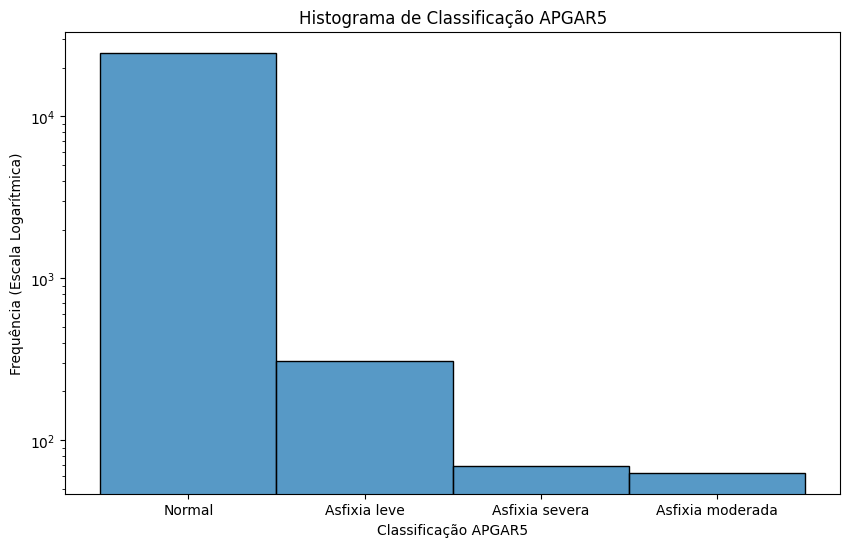

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Função que categoriza o grau de asfixia com base na coluna APGAR5
def classificao_apgar5(index) -> str:
    if index <= 3:
        return 'Asfixia severa'
    elif 4 <= index <= 5:
        return 'Asfixia moderada'
    elif 6 <= index <= 7:
        return 'Asfixia leve'
    elif 8 <= index <= 10:
        return 'Normal'

# Aplicar a função ao DataFrame usando .loc para evitar o SettingWithCopyWarning
df6.loc[:, 'Classif_APGAR5'] = df6['APGAR5'].map(classificao_apgar5)

# Plotar o histograma com escala logarítmica no eixo y
plt.figure(figsize=(10, 6))
sns.histplot(data=df6['Classif_APGAR5'], stat='frequency')
plt.yscale('log')  # Define a escala do eixo y para logarítmica
plt.title('Histograma de Classificação APGAR5')
plt.xlabel('Classificação APGAR5')
plt.ylabel('Frequência (Escala Logarítmica)')
plt.show()


## Parte 9

Renomeie as variáveis para que fiquem no *snake case*, ou seja, em letras minúsculas, com um *underscore* entre as palávras. Dica: repare que se você não quiser criar um *dataframe* novo, você vai precisar usar a opção ```inplace = True```.

In [33]:
# Renomear todas as colunas do DataFrame para letras minúsculas
final_df = df6.rename(str.lower, axis=1)
# Exibir as primeiras linhas do DataFrame para verificar se as colunas foram renomeadas corretamente
final_df.head()

,locnasc,idademae,estcivmae,escmae,qtdfilvivo,gestacao,gravidez,consultas,apgar5,classif_apgar5
0,1,19,5.0,8 a 11 anos,0.0,37 a 41 semanas,Única,4,10.0,Normal
1,1,29,2.0,8 a 11 anos,1.0,37 a 41 semanas,Única,4,9.0,Normal
3,1,30,5.0,12 anos ou mais,0.0,37 a 41 semanas,Única,3,10.0,Normal
4,1,30,2.0,8 a 11 anos,1.0,37 a 41 semanas,Única,4,10.0,Normal
5,1,33,5.0,1 a 3 anos,2.0,37 a 41 semanas,Única,4,10.0,Normal


df6.rename(str.lower, axis=1):

O método .rename() é utilizado para renomear os rótulos (labels) de um eixo específico.

str.lower é uma função que converte strings para letras minúsculas.
axis=1 especifica que queremos aplicar essa função aos nomes das colunas (eixo 1).